In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as dates
from matplotlib.animation import FuncAnimation
import seaborn as sns
import requests
from scipy.optimize import curve_fit
import math
sns.set_style('darkgrid')

In [2]:
open('full_data.csv', 'wb').write(requests.get('https://covid.ourworldindata.org/data/ecdc/full_data.csv').content) # get the data from the URL

In [2]:
df = pd.read_csv('full_data.csv').set_index('date')
df.index = pd.to_datetime(df.index)

No handles with labels found to put in legend.


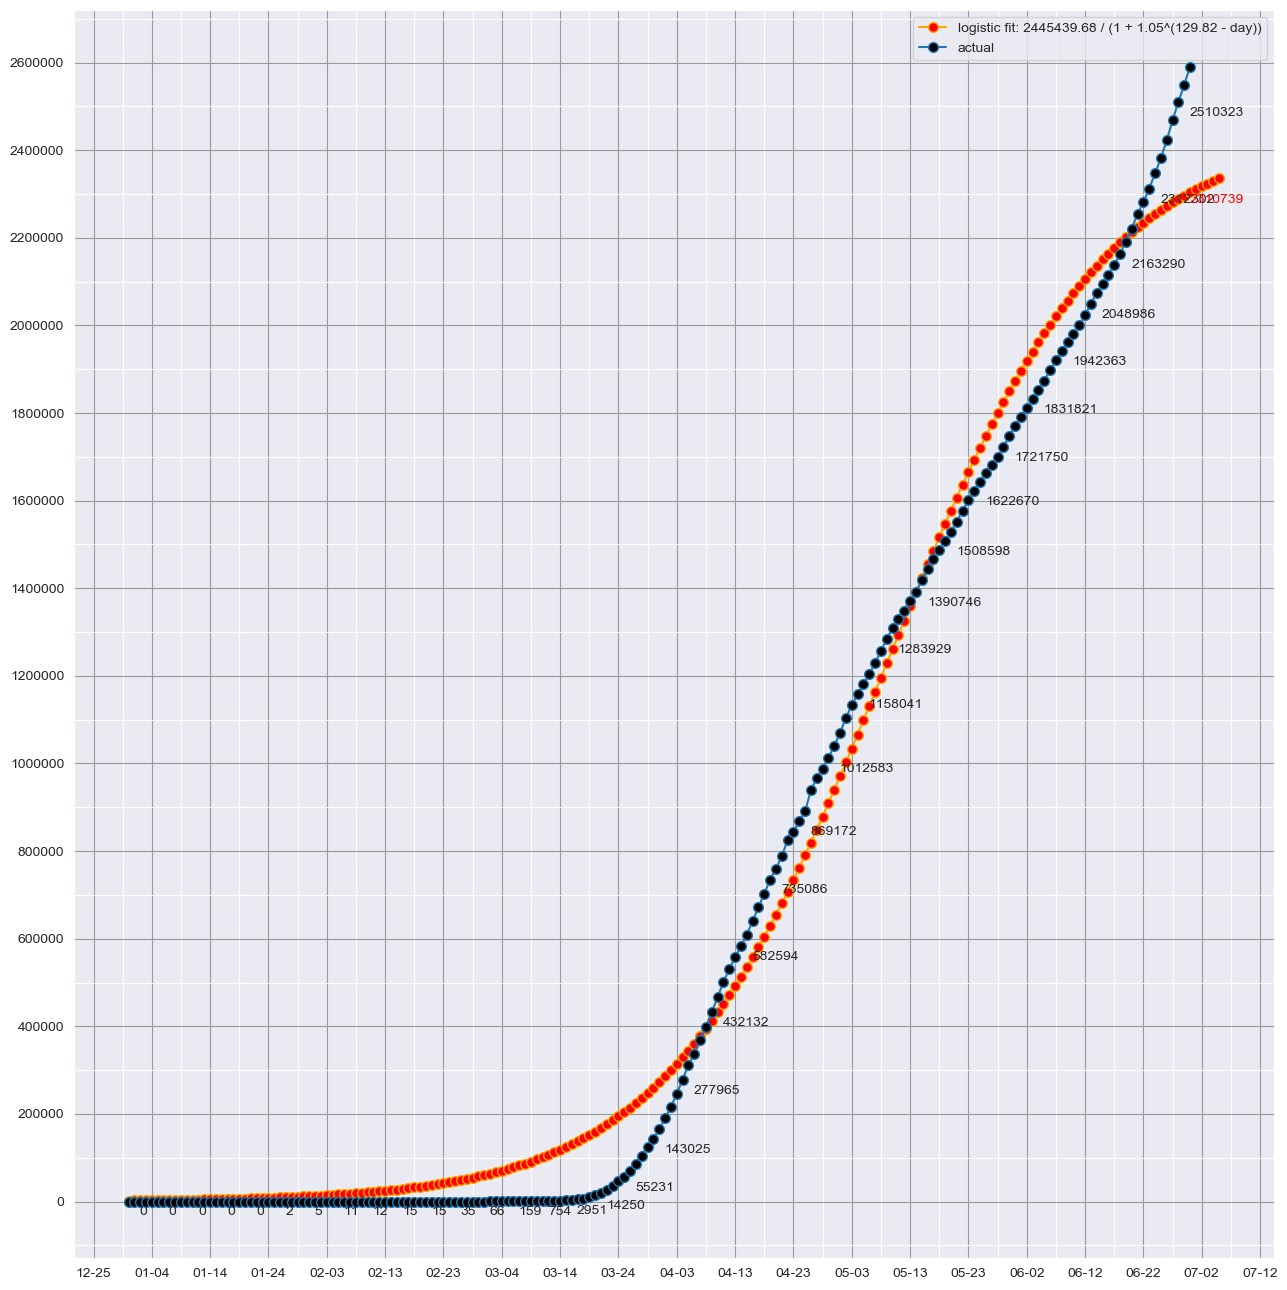

In [38]:
def exponential(x, a, b, c):
    return a * b**x + c

def logistic(x, L, k, a, ):
    return L / (1 + k**(a - x))

def get_prediction():
    x = pd.Series(to_plot.index).apply(pd.Timestamp.toordinal) - to_plot.index[0].toordinal()
    y = to_plot
    popt, pcov = curve_fit(func, x, y, maxfev = 15000, )
    return popt, func(np.arange(len(date_idx)), *popt)

def make_plot(daysep, casesep, annotsep):
    fig, ax = plt.subplots(figsize = (13, 13), dpi = 100)
    ax.plot(date_idx, prediction, color = 'orange', marker = 'o', markerfacecolor='red', markersize=7)
    ax.plot(to_plot, marker = 'o', markerfacecolor='black', markersize=7)

    ax.xaxis.set_major_locator(dates.DayLocator(interval = daysep[0]))
    ax.xaxis.set_minor_locator(dates.DayLocator(interval = daysep[1]))
    ax.xaxis.set_major_formatter(dates.DateFormatter('%m-%d'))

    ax.yaxis.set_major_locator(ticker.MultipleLocator(casesep[0]))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(casesep[1]))
    plt.grid(which = 'major', color = '#999999')
    plt.grid(which = 'minor', color = '#ffffff')
    plt.legend()
    plt.legend([f'exponential fit: {round(popt[0], 2)} * {round(popt[1], 2)}^day + {round(popt[2], 2)}' if func is exponential else
                f'logistic fit: {round(popt[0], 2)} / (1 + {round(popt[1], 2)}^({round(popt[2], 2)} - day))',
                'actual'])
    fig.tight_layout()
    
    for x, y in list(to_plot.iteritems())[::annotsep]:
        ax.annotate(str(int(y)), xy=(x,y), xytext=(8,-10), textcoords='offset points')
    for x, y in list(zip(date_idx[days-3:], prediction[days:]))[::annotsep]:
        ax.annotate(str(int(y)), xy=(x,y), xytext=(8,-10), textcoords='offset points', color = 'red')
    plt.savefig('cases.png', pad_inches = 0)

to_plot = df[df['location']=='United States']['total_cases'][:] # can change to deaths or new cases
days = len(to_plot)
extension = 5
date_idx = pd.date_range(to_plot.index[0], to_plot.index[-1] + pd.Timedelta(days=extension))

func = logistic # logistic or exponential. fits were only accurate in the first few months of spreading
popt, prediction = get_prediction()

make_plot((10, 5), # major, minor
          (200000, 100000), # major, minor
          5) # sep of numbers next to the graph

<Figure size 432x288 with 0 Axes>

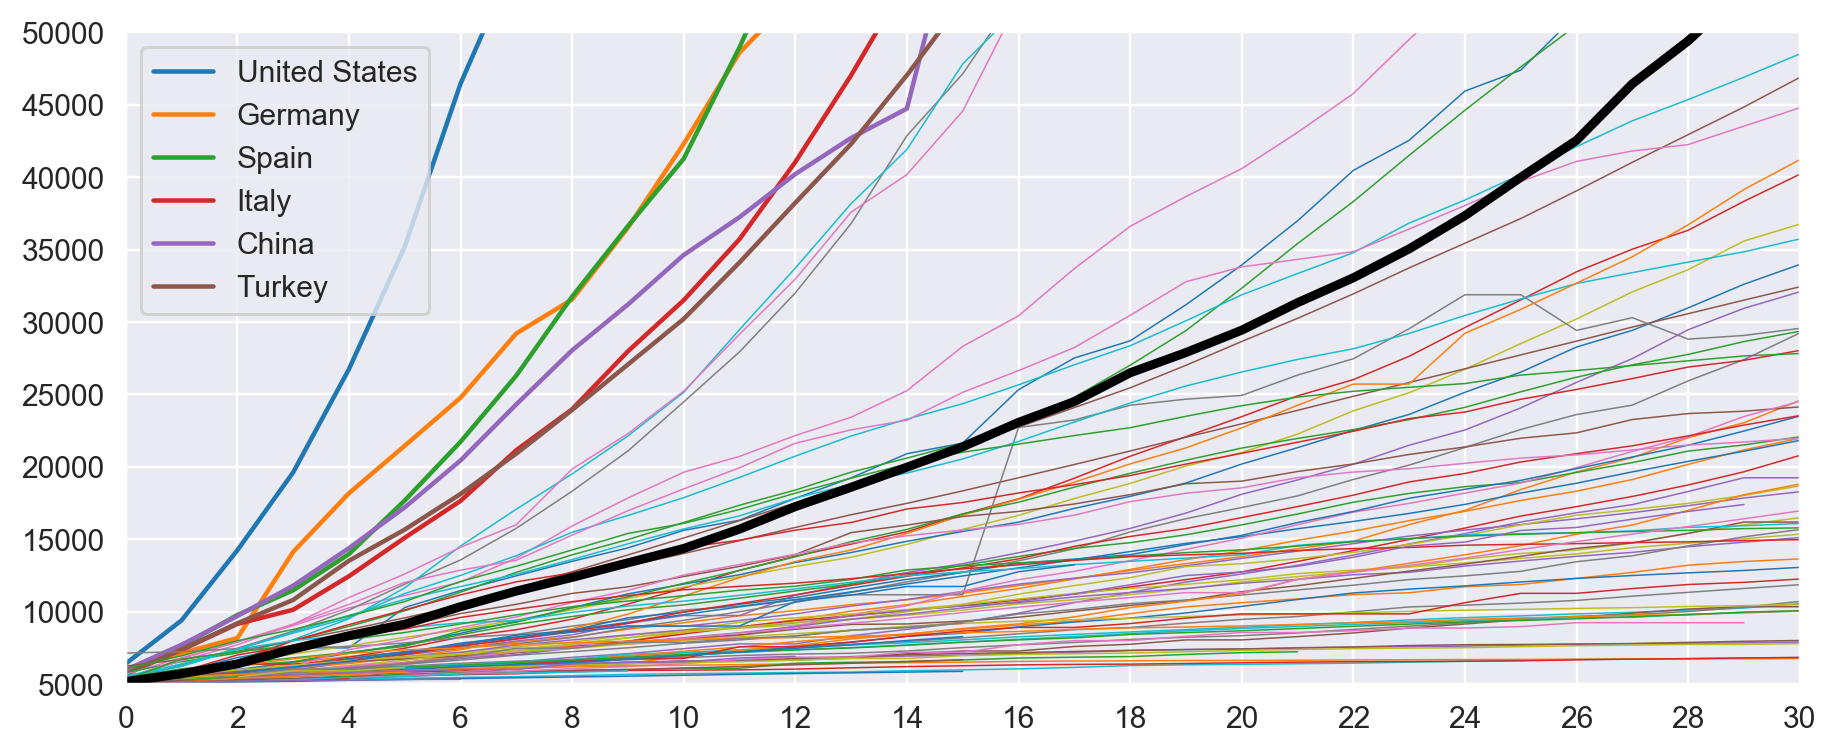

In [35]:
'''
Comparison of a chosen country (in black) with all countries from 1000 to 50000 cases
'''
chosen = 'India'
new_df = {}
ymin = 5000
for country in df.location.unique():
    data = df[df.location == country]
    if data.iloc[-1].total_cases > ymin:
        new_df[country]=[]
        
for country in new_df:
    for _, row in df[df.location == country].iterrows():
        if row.total_cases > ymin:
            new_df[country].append(row.total_cases)
new_df.pop('World')
None

ymax = 50000
plt.tight_layout()
plt.figure(figsize = (10, 4), dpi=1080//5)
to_iter = sorted(new_df, key = lambda x: new_df[x][-1], reverse = True)
top = sorted([j for j in new_df if new_df[j][-1] >= ymax], key = lambda x: [i>=ymax for i in new_df[x]].index(True))[:6]

for i in top:
    plt.plot(new_df[i], linewidth = 1.5)
plt.legend(top)

for i in to_iter:
    if i not in top:
        plt.plot(new_df[i], linewidth = 0.5)
    
plt.plot(new_df[chosen], linewidth = 3, color = 'Black')

plt.ylim([ymin, ymax])
plt.xlim([0, 30])
plt.xticks(np.arange(0, 31, 2))
plt.savefig('cases.png')

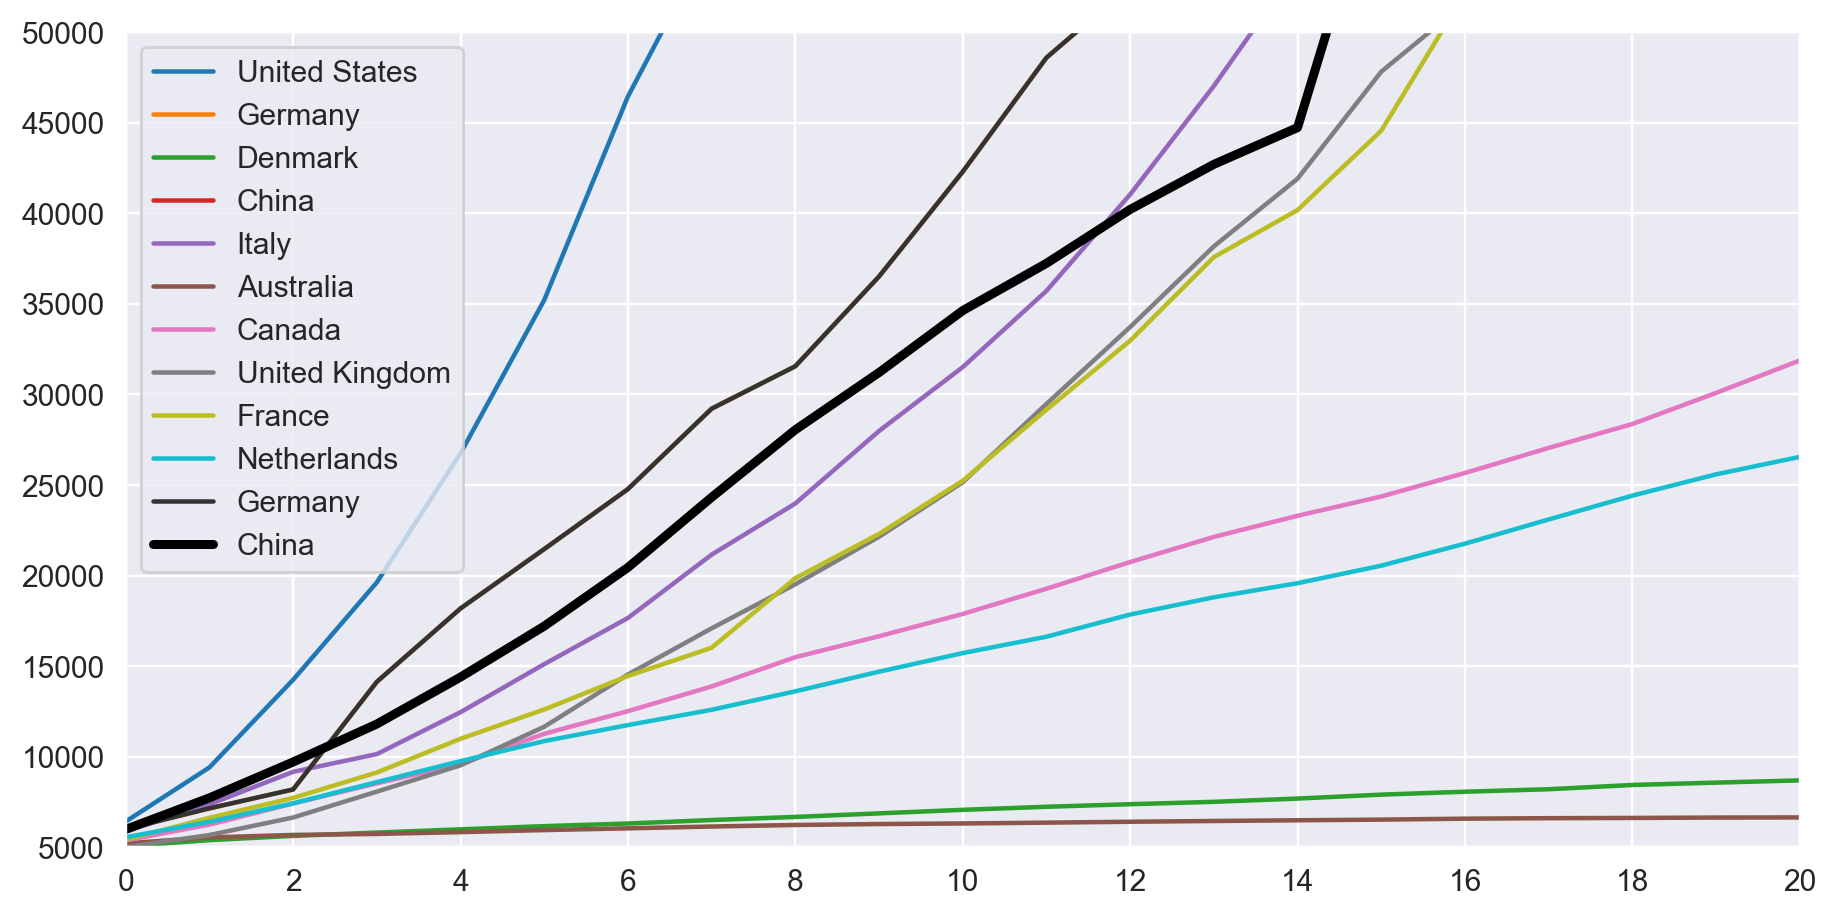

In [39]:
'''
Note: please run the above cell first to get the data ready.
Comparison of a chosen country (in black) with all countries from 5000 to 50000 cases
'''
chosen = 'China'
days = 20

countries = ['United States', 'Germany', 'Denmark', 'China', 'Italy', 'Australia', 'Canada', 'United Kingdom', 'France', 'Netherlands', 'Germany', chosen]

plt.figure(figsize = (10, 5), dpi = 1080//5)
for country in countries[:-2]:
    plt.plot(new_df[country])
    
plt.plot(new_df['Germany'], color = '#333333')
plt.plot(new_df[chosen], linewidth = 3, color = 'BLACK')
plt.ylim([ymin, ymax])
plt.xlim([0, days])
plt.xticks(np.arange(0, days+1, 2))
plt.legend(countries)
plt.savefig('cases.png')